In [1]:
#import all tasks
import pandas as pd 
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("inings.csv")
df2=pd.read_csv("deliveries.csv")

In [3]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

there are 18 columns which includes three types of data (int64,object,float64) total number of entries are 636 indexing starts 
from 0 to 635;

In [5]:
## find null values 
df1.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
#drop umpire3 column as it contains more than 75% of null values
df1.drop("umpire3",axis=1,inplace=True)

In [7]:
#drop null values of city , winner ,player_of_match,umpire1,umpire2 column
df1.dropna(inplace=True)

<AxesSubplot:>

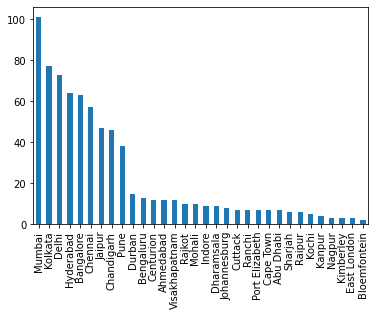

In [8]:
#The most matches played are in Mumbai and the least matches played are in Bloemfontein
df1["city"].value_counts().plot(kind="bar")

<AxesSubplot:>

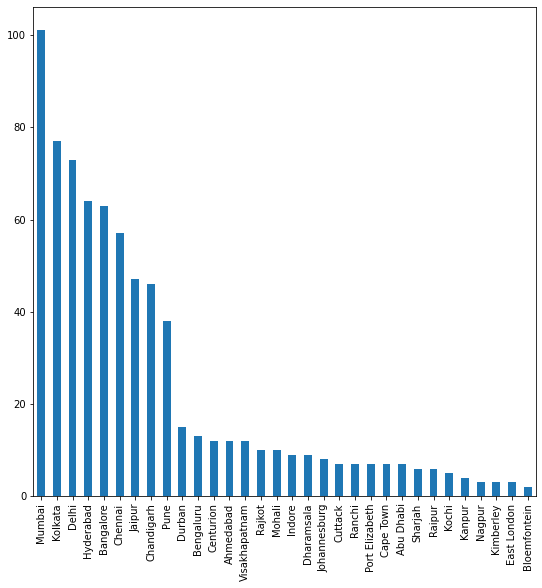

In [9]:
#which city hosted most number of matches?
#draw bar plot and write down your insights
plt.figure(figsize=(9,9))
df1["city"].value_counts().plot(kind="bar")

In [10]:
#find all venue of mumbai city
df1[df1["city"]=="Mumbai"]["venue"].unique()

array(['Wankhede Stadium', 'Dr DY Patil Sports Academy',
       'Brabourne Stadium'], dtype=object)

<AxesSubplot:>

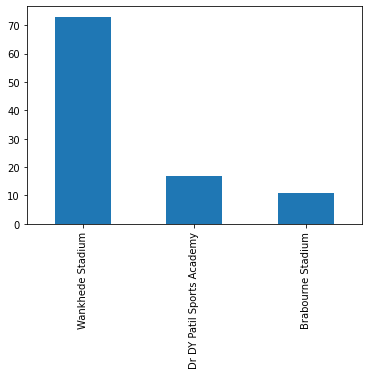

In [11]:
#The most matches played in Mumbai were in Wankhede Stadium which were 70 matches in total.
df1[df1["city"]=="Mumbai"]["venue"].value_counts().plot(kind="bar")

<AxesSubplot:>

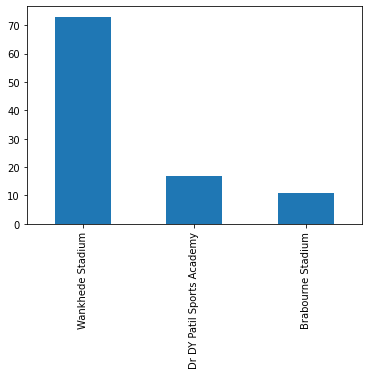

In [12]:
#now compare in which venue of mumbai most number of matches played 
df1[df1["city"]=="Mumbai"]["venue"].value_counts().plot(kind="bar")

The most number of matches played in mumbai is wankhede stadium the number of count of matches is 70 and least number of matches played in  mumbai-braboume stadium number of matches played in braboume stadium is 10.and mumbai-dr dy patil sports academy number of matches played is 15. 

In [13]:
#what is the preferred choice after winning a toss in mumbai
df1[df1["city"]=="Mumbai"]["toss_decision"].value_counts()

field    66
bat      35
Name: toss_decision, dtype: int64

<AxesSubplot:>

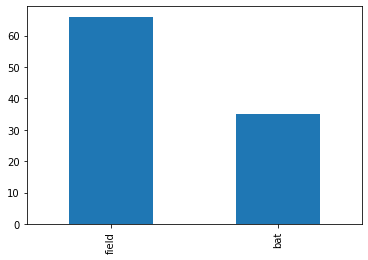

In [14]:
#graphical representation of above question
df1[df1["city"]=="Mumbai"]["toss_decision"].value_counts().plot(kind="bar")

In [15]:
#which team won most number of toss
df1["toss_winner"].value_counts()

Mumbai Indians                 96
Kolkata Knight Riders          91
Chennai Super Kings            89
Kings XI Punjab                80
Delhi Daredevils               79
Royal Challengers Bangalore    78
Rajasthan Royals               77
Sunrisers Hyderabad            45
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                  9
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

<AxesSubplot:>

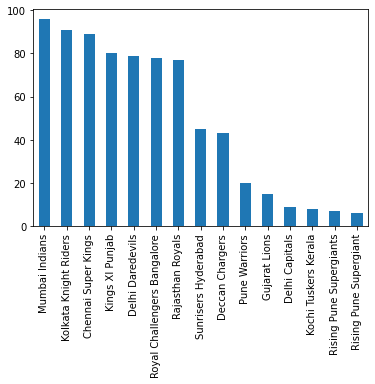

In [16]:
#show graphical representation of above question
df1["toss_winner"].value_counts().plot(kind="bar")

In [17]:
#find what mumbai indians preferred after winning a toss?
df1[df1["toss_winner"]=="Mumbai Indians"]["toss_decision"].value_counts()

field    53
bat      43
Name: toss_decision, dtype: int64

In [18]:
#head to head winning count of Mumbai Indians vs Chennai Super Kings
df1[(df1["team1"]=="Mumbai Indians")& (df1["team2"]=="Chennai Super Kings")|(df1["team1"]=="Chennai Super Kings")& (df1["team2"]=="Mumbai Indians")]["winner"].value_counts()

Mumbai Indians         17
Chennai Super Kings    10
Name: winner, dtype: int64

In [19]:
#Which team won most of the matches in mumbai?
df1[df1["city"]=="Mumbai"]["winner"].value_counts()

Mumbai Indians                 53
Chennai Super Kings            11
Rajasthan Royals                7
Kings XI Punjab                 5
Royal Challengers Bangalore     5
Deccan Chargers                 3
Kolkata Knight Riders           3
Pune Warriors                   3
Delhi Daredevils                3
Rising Pune Supergiant          2
Sunrisers Hyderabad             2
Kochi Tuskers Kerala            1
Rising Pune Supergiants         1
Gujarat Lions                   1
Delhi Capitals                  1
Name: winner, dtype: int64

In [20]:
#how many times each team won the toss and won the match
df1[(df1["toss_winner"])==(df1["winner"])]["winner"].value_counts()

Chennai Super Kings            57
Mumbai Indians                 56
Kolkata Knight Riders          53
Rajasthan Royals               42
Royal Challengers Bangalore    39
Delhi Daredevils               35
Kings XI Punjab                34
Sunrisers Hyderabad            22
Deccan Chargers                19
Gujarat Lions                  10
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Pune Warriors                   3
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [21]:
#how many times each team won the toss and won the match in mumbai
df1[(df1["toss_winner"]==df1["winner"])& (df1["city"]=="Mumbai")]["winner"].value_counts()

Mumbai Indians                 30
Chennai Super Kings             8
Rajasthan Royals                4
Deccan Chargers                 3
Delhi Daredevils                3
Royal Challengers Bangalore     2
Kochi Tuskers Kerala            1
Kolkata Knight Riders           1
Gujarat Lions                   1
Name: winner, dtype: int64

<AxesSubplot:>

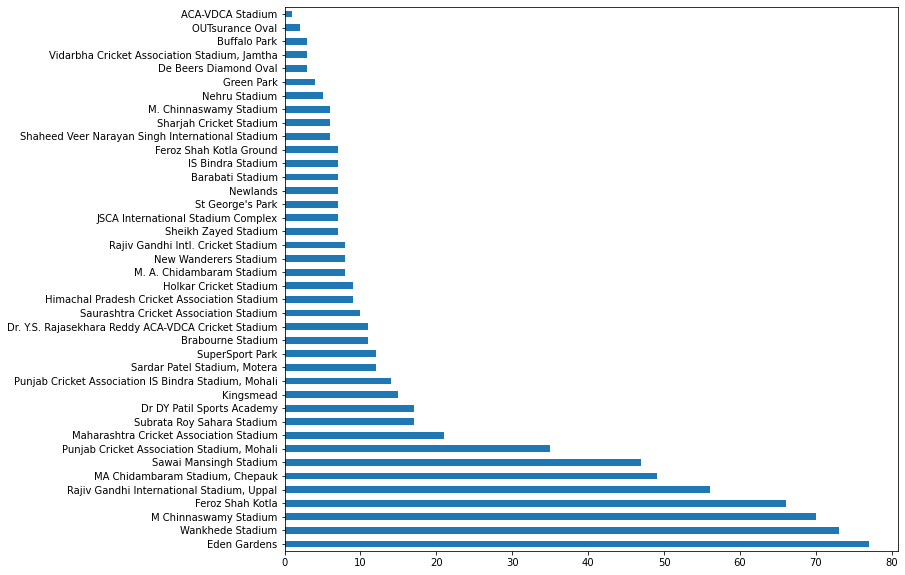

In [22]:
#which venue hosted most number of matches
plt.figure(figsize=(11,10))
df1["venue"].value_counts().plot(kind="barh")


In [23]:
df1[(df1["team2"]=="Chennai Super Kings")&(df1["venue"]=="M Chinnaswamy Stadium")| (df1["team1"]=="Chennai Super Kings")&(df1["venue"]=="M Chinnaswamy Stadium")]["venue"].count()

8

In [24]:
#who won most matches at M Chinnaswamy stadium?
df1[df1["venue"]=="M Chinnaswamy Stadium"]["winner"].value_counts()

Royal Challengers Bangalore    33
Mumbai Indians                  8
Kolkata Knight Riders           7
Kings XI Punjab                 5
Chennai Super Kings             5
Rajasthan Royals                4
Delhi Daredevils                3
Sunrisers Hyderabad             2
Rising Pune Supergiant          1
Gujarat Lions                   1
Deccan Chargers                 1
Name: winner, dtype: int64

# year wise analysis

<AxesSubplot:ylabel='season'>

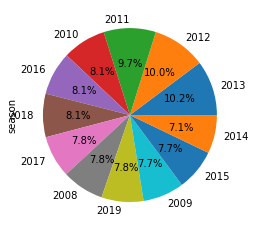

In [25]:
df1["season"].value_counts().plot(kind="pie",autopct='%0.1f%%')

<AxesSubplot:ylabel='season'>

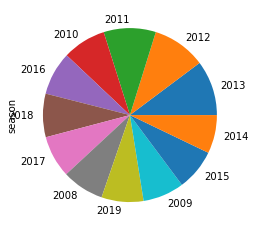

In [26]:
#matches played in each year graphical Representation
df1["season"].value_counts().plot(kind="pie")

In [27]:
#lets analyse ipl season held in 2013
#extract all the details of 2013 season
#here we will create yearwise groups (hint: use groupby() function)
y=df1.groupby("season")
t=y.get_group(2013)
t.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
381,382,2013,Kolkata,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens,S Ravi,SJA Taufel
382,383,2013,Bangalore,2013-04-04,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,2,0,CH Gayle,M Chinnaswamy Stadium,VA Kulkarni,C Shamshuddin
383,384,2013,Hyderabad,2013-04-05,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,normal,0,Sunrisers Hyderabad,22,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel
384,385,2013,Delhi,2013-04-06,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin
385,386,2013,Chennai,2013-04-06,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni


<AxesSubplot:ylabel='city'>

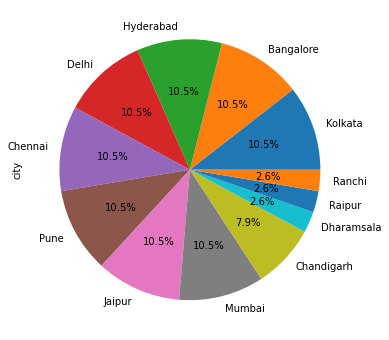

In [28]:
#which city hosted most number of matches in 2013 
plt.figure(figsize=(6,6))
df1[df1["season"]==2013]["city"].value_counts().plot(kind="pie",autopct='%0.1f%%')

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [30]:
df2[["player_dismissed"]].value_counts()

player_dismissed
SK Raina            162
RG Sharma           155
RV Uthappa          153
V Kohli             143
S Dhawan            137
                   ... 
C Madan               1
SMSM Senanayake       1
P Chopra              1
P Krishna             1
M Santner             1
Length: 487, dtype: int64

In [31]:
df2[["fielder"]].value_counts()

fielder         
MS Dhoni            159
KD Karthik          152
RV Uthappa          125
SK Raina            115
AB de Villiers      114
                   ... 
Mashrafe Mortaza      1
Misbah-ul-Haq         1
Ankit Soni            1
N Pooran              1
R Powell (sub)        1
Length: 499, dtype: int64

<AxesSubplot:xlabel='dismissal_kind'>

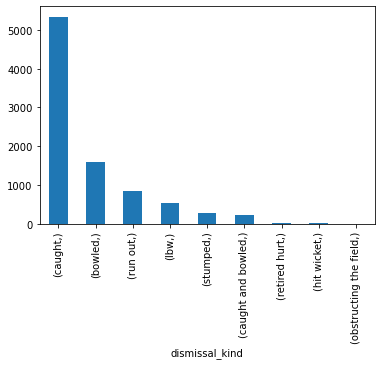

In [32]:
df2[["dismissal_kind"]].value_counts().plot(kind="bar")

In [33]:
#Find Team wise runs scored.
df2.groupby(['batting_team','bowling_team'])['total_runs'].sum()

batting_team         bowling_team               
Chennai Super Kings  Deccan Chargers                1592
                     Delhi Capitals                  505
                     Delhi Daredevils               2937
                     Kings XI Punjab                3591
                     Kochi Tuskers Kerala            283
                                                    ... 
Sunrisers Hyderabad  Pune Warriors                   245
                     Rajasthan Royals               1674
                     Rising Pune Supergiant          312
                     Rising Pune Supergiants         255
                     Royal Challengers Bangalore    2501
Name: total_runs, Length: 160, dtype: int64

In [34]:
# Find Total Runs of Virat Kohli.
df2[(df2['batsman']=='V Kohli')|(df2['non_striker']=='V Kohli')|(df2['bowler']=='V Kohli')|(df2['fielder']=='V Kohli')]["total_runs"].sum()

11830

In [35]:
# Find Total Runs of Your Fav Player.
df2[(df2['batsman']=='SK Raina')|(df2['non_striker']=='SK Raina')|(df2['bowler']=='SK Raina')|(df2['fielder']=='SK Raina')]["total_runs"].sum()

12391

In [36]:
# Extra Runs Given By All Bowlers in a League.

df2.groupby(["bowler"])["extra_runs"].sum()

bowler
A Ashish Reddy     14
A Chandila          3
A Choudhary         7
A Dananjaya         1
A Flintoff          1
                 ... 
YA Abdulla         17
YK Pathan          71
YS Chahal         116
Yuvraj Singh       27
Z Khan            169
Name: extra_runs, Length: 405, dtype: int64

In [37]:
# Extra Runs Given By TS Mills.
df2[(df2["bowler"]=='TS Mills')|(df2["batsman"]=='TS Mills')|(df2["non_striker"]=='TS Mills')|(df2["fielder"]=='TS Mills')]["extra_runs"].sum()

14

In [38]:
# Catches Taken By Mandeep Singh.
df2[(df2["fielder"]=='Mandeep Singh')&(df2["dismissal_kind"]=='caught')]["fielder"].count()

35

In [39]:
# How Many Times DA Warner is dismissed by Mohammed Shami.

df2[(df2['batsman']=='Mohammed Shami')|(df2['non_striker']=='Mohammed Shami')|(df2['bowler']=='Mohammed Shami')&(df2['player_dismissed']=='DA Warner')]['player_dismissed'].count()

15

In [40]:
# Total Number of Wickets Taken by YS Chahal.
df2[(df2["bowler"]=='YS Chahal')]['player_dismissed'].count()

102

In [41]:
# Find Number of Stump Out done by MS Dhoni.

df2[(df2["fielder"]=='MS Dhoni')&(df2["dismissal_kind"]=='stumped')]["dismissal_kind"].count()

38

In [42]:
# How Many Times S Dhawan Got Out by lbw.

df2[(df2["player_dismissed"]=='S Dhawan')&(df2["dismissal_kind"]=='lbw')]["player_dismissed"].count()

8

In [43]:
# Total number sixes hit by MS Dhoni.

df2[(df2["batsman"]=='MS Dhoni')&(df2["batsman_runs"]==6)]["batsman_runs"].count()

207

In [44]:
# Total numbers of balls faced by MI Players.

df2[(df2["batting_team"]=='Mumbai Indians')]["ball"].sum()

82113

In [45]:
# Total numbers of balls faced by KKR Players.

df2[(df2["batting_team"]=='Kolkata Knight Riders')]["ball"].sum()

75539

In [46]:
# Find the total number of runs scored by Sachin Tendulkar.

df2[(df2['batsman']=='SR Tendulkar')|(df2['non_striker']=='SR Tendulkar')|(df2['bowler']=='SR Tendulkar')|(df2['fielder']=='SR Tendulkar')]["total_runs"].sum()

5427

In [47]:
# Find the total number of balls faced by Schin Tendulkar.

df2[(df2["batsman"]=='SR Tendulkar')]["ball"].sum()

7375

<AxesSubplot:ylabel='dismissal_kind'>

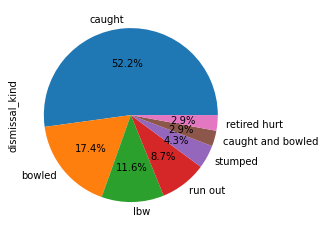

In [48]:
# Find Sachin Tendulkar's dismissal types in IPL.

df2[(df2["player_dismissed"]=='SR Tendulkar')]["dismissal_kind"].value_counts().plot(kind="pie",autopct='%0.1f%%')

In [49]:
# Find the bowlers who dismissed SR Tendulkar.

df2[(df2["player_dismissed"]=='SR Tendulkar')]["bowler"].value_counts()

PP Chawla          3
R Bhatia           3
RP Singh           3
DE Bollinger       2
PJ Sangwan         2
SB Jakati          2
A Nehra            2
JH Kallis          2
R Sharma           2
A Mishra           2
SP Narine          2
R Vinay Kumar      2
P Kumar            2
IK Pathan          2
M Kartik           1
DP Nannes          1
J Syed Mohammad    1
Azhar Mahmood      1
M Morkel           1
V Pratap Singh     1
BAW Mendis         1
RA Jadeja          1
R Ashwin           1
I Sharma           1
UT Yadav           1
HV Patel           1
A Chandila         1
Shakib Al Hasan    1
AJ Finch           1
A Singh            1
Z Khan             1
Joginder Sharma    1
Anand Rajan        1
Yuvraj Singh       1
Shahid Afridi      1
VY Mahesh          1
SK Trivedi         1
PP Ojha            1
LR Shukla          1
VS Malik           1
AB Agarkar         1
D du Preez         1
SK Warne           1
SK Raina           1
AD Mascarenhas     1
L Balaji           1
T Thushara         1
DW Steyn     

In [50]:
# How many times was Suresh Raina dismissed

df2[(df2["player_dismissed"]=='SK Raina')]["player_dismissed"].count()

162

In [51]:
# Display player details who hit the maximum no of sixes in the current IPL tournament.
df2[(df2["batsman_runs"]==6)]["batsman"].max()

'Z Khan'

<AxesSubplot:ylabel='noball_runs'>

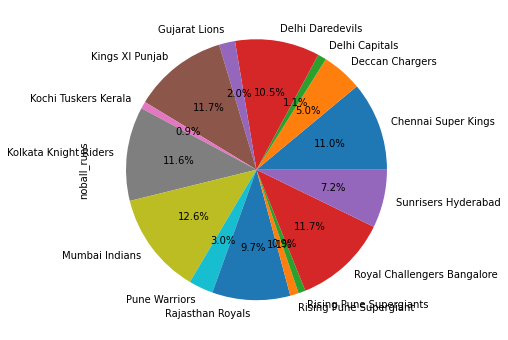

In [52]:
# What is the Overall No Balls Runs for each team in the dataset?
plt.figure(figsize=(6,6))
df2.groupby(['batting_team'])['noball_runs'].count().plot(kind="pie",autopct='%0.1f%%')

In [53]:
# Which player scored the most runs in the dataset?

df2.groupby(['batsman','non_striker','bowler'])['total_runs'].max()

batsman         non_striker      bowler      
A Ashish Reddy  A Mishra         AB Dinda        1
                                 AD Mathews      6
                                 MR Marsh        1
                AA Jhunjhunwala  P Kumar         1
                                 PP Chawla       1
                                                ..
Z Khan          SS Tiwary        DE Bollinger    4
                                 DJ Bravo        1
                                 DW Steyn        0
                                 R Ashwin        1
                                 SB Jakati       4
Name: total_runs, Length: 42424, dtype: int64

In [59]:
#team wise how many players are dismissed

df2.groupby(['batting_team','bowling_team'])['player_dismissed'].count()

batting_team         bowling_team               
Chennai Super Kings  Deccan Chargers                 60
                     Delhi Capitals                  11
                     Delhi Daredevils               103
                     Kings XI Punjab                 99
                     Kochi Tuskers Kerala             9
                                                   ... 
Sunrisers Hyderabad  Pune Warriors                   14
                     Rajasthan Royals                70
                     Rising Pune Supergiant          12
                     Rising Pune Supergiants         16
                     Royal Challengers Bangalore     71
Name: player_dismissed, Length: 160, dtype: int64

In [56]:
#how many overs Royal Challengers Bangalore had taken

df[(df["bowling_team"]=='Royal Challengers Bangalore')]['over'].sum()

215534.0

In [57]:
#overs taken by TS Mills 

df2[(df2["bowler"]=='TS Mills')]['over'].sum()

1189.0

In [60]:
#list of team whose taken penalty runs 

df2[(df2["penalty_runs"]!=0)]['batting_team'].sum()

'Delhi DaredevilsDelhi Daredevils'

In [61]:
#total penalty runs of Delhi Daredevils

df2[(df2["batting_team"]=='Delhi Daredevils')]['penalty_runs'].count()

18786

In [62]:
#legbye runs of each team in ipl
df2.groupby(['batting_team'])['legbye_runs'].count()

batting_team
Chennai Super Kings            19762
Deccan Chargers                 9034
Delhi Capitals                  1909
Delhi Daredevils               18786
Gujarat Lions                   3566
Kings XI Punjab                20931
Kochi Tuskers Kerala            1582
Kolkata Knight Riders          20858
Mumbai Indians                 22619
Pune Warriors                   5443
Rajasthan Royals               17292
Rising Pune Supergiant          1900
Rising Pune Supergiants         1580
Royal Challengers Bangalore    20908
Sunrisers Hyderabad            12908
Name: legbye_runs, dtype: int64

In [63]:
#player dismissed by retired hurt
df2[(df2["dismissal_kind"]=='retired hurt')]['player_dismissed'].value_counts()

Harbhajan Singh    2
SR Tendulkar       2
KH Pandya          1
DJ Thornely        1
VVS Laxman         1
AJ Finch           1
KP Pietersen       1
S Dhawan           1
N Rana             1
JJ Bumrah          1
Name: player_dismissed, dtype: int64

In [64]:
#player dismissed by caught and bowled top five
df2[(df2["dismissal_kind"]=='caught and bowled')]['player_dismissed'].value_counts().head()

SK Raina     7
RG Sharma    6
AT Rayudu    5
RA Jadeja    5
R Dravid     5
Name: player_dismissed, dtype: int64

In [65]:
#max runout dismissed player deatails 
df2[(df2["dismissal_kind"]=='run out')]['player_dismissed'].value_counts().head(1)

G Gambhir    16
Name: player_dismissed, dtype: int64

In [66]:
#how many times Kolkata Knight Riders vs Delhi Daredevils played matches in ipl
y=df2[((df2["batting_team"]=='Kolkata Knight Riders')&(df2["bowling_team"]=='Delhi Daredevils'))|((df2["batting_team"]=='Delhi Daredevils')&(df2["bowling_team"]=='Kolkata Knight Riders'))].count()
y.sum()

88876

In [67]:
#how many times Chennai Super Kings played as a bowling_team
y=df2[(df2["bowling_team"]=='Chennai Super Kings')].count()
y.sum()

354840

In [68]:
#how many times Royal Challengers Bangalore played as a batting_team
y=df2[(df2["batting_team"]=='Royal Challengers Bangalore')].count()
y.sum()

379150

In [69]:
#total runs of SR Watson
df2[(df2['batsman']=='SR Watson')|(df2['non_striker']=='SR Watson')|(df2['bowler']=='SR Watson')|(df2['fielder']=='SR Watson')]["total_runs"].sum()

9696

In [70]:
#bats man runs of Basil Thampi
df2[(df2["batsman"]=='Basil Thampi')]['batsman_runs'].sum()

32

In [71]:
#how many times Yuvraj Singh dismissed
df2[(df2["player_dismissed"]=='Yuvraj Singh')]['player_dismissed'].count()

111

In [72]:
#overs taken by JP Duminy
df2[(df2["batsman"]=='JP Duminy')]['over'].sum()

20804

In [73]:
#how many times KC Sangakkara dismissed by RV Uthappa
df2[(df2['batsman']=='RV Uthappa')|(df2['non_striker']=='RV Uthappa')|(df2['bowler']=='RV Uthappa')&(df2['player_dismissed']=='KC Sangakkara')]['player_dismissed'].count()

313

In [74]:
#extra runs taken by DT Christian
df2[(df2["bowler"]=='DT Christian')|(df2["batsman"]=='DT Christian')|(df2["non_striker"]=='DT Christian')|(df2["fielder"]=='DT Christian')]["extra_runs"].sum()

105

In [75]:
#Pune Warriors no boll runs
df2[(df2["batting_team"]=='Pune Warriors')]["noball_runs"].sum()

24

In [78]:
#cocatinating two dataframe
df=pd.concat([df1,df2])